## 2.0 Linear Regression

In Linear Regression, the dependent variable is continuous, independent variable(s) can be continuous or discrete, and nature of regression line is linear. Linear Regression establishes a relationship between dependent variable (Y) and one or more independent variables (X) using a best fit straight line, also known as regression line.

If the data actually lies on a line, then two sample points will be enough to get a perfect prediction. But, as in the example below, the input data is seldom perfect, so our “predictor” is almost always off by a bit. In this image, it's clear that only a small fraction of the data points appear to lie on the line itself.

![alt text](https://github.com/lesley2958/regression/blob/master/linreg.png?raw=true "Logo Title Text 1")

It's obvious that we can't assume a perfect prediction based off of data like this, so instead we wish to summarize the trends in the data using a simple description mechanism. In this case, that mechanism is a line. Now the computation required to find the “best” coefficients of the line is quite straightforward once we pick a suitable notion of what “best” means. This is what we mean by best fit line. 


### 2.1 Basic Equation

The variable that we want to predict, `x`, is called the independent variable. We can collect values of y for known values of x in order to derive the co-efficient and y-intercept of the model using certain assumptions. The equation looks like below:

``` 
y = a + bx + e
```

Here, `a` is the y-intercept, `b` is the slope of the line, and `e` is the error term. Usually we don't know the error term, so we reduce this equation to:

```
y = a + bx
```

### 2.2 Error Term

The difference between the observed value of the dependent variable and the predicted value is called the error term, or residual. Each data point has its own residual.

When a residual plot shows a random pattern, it indicated a good fit for a linear model. The error, or loss, function specifics depends on the type of machine learning algorithm. In Regression, it's (y - y&#770;)<sup>2</sup>, known as the <b>squared</b> loss. Note that the loss function is something that you must decide on based on the goals of learning. 

### 2.3 Assumptions

There are four assumptions that allow for the use of linear regression models. If any of these assumptions is violated, then the forecasts, confidence intervals, and insights yielded by a regression model may be inefficient, biased, or misleading. 

#### 2.3.1 Linearity

The first assumption is the linearity and additivity between dependent and independent variables. Because of this assumption, the expected value of dependent variable is a straight-line function of each independent variable, holding the others fixed. Lastly, the slope of this doesn't depend on the other variables. 

#### 2.3.2 Statistical Independence

The statistical independence of the errors means there is no correlation between consecutive errors.

#### 2.3.3 Homoscedasticity

This refers to the idea that there is a constant variance of errors. This is true against time, predictions, and any independent variable. 

#### 2.3.4 Error Distribution

This says that the distribution of errors is normal.

### 2.4 Correlation Coefficient 

The standardized correlation coefficient is the same as Pearson's correlation coefficient. While correlation typically refers to Pearson’s correlation coefficient, there are other types of correlation, such as Spearman’s.

### 2.5 Variance

Recall that variance gives us an idea of the range or spread of our data and that we denote this value as &sigma;<sup>2</sup>. In the context of regression, this matters because it gives us an idea of how accurate our model is.

For example, given the two graphs below, we can see that the second graph would be a more accurate model. 

![alt text](https://github.com/lesley2958/regression/blob/master/ther1.jpeg?raw=true "Logo Title Text 1")

![alt text](https://github.com/lesley2958/regression/blob/master/ther2.jpeg?raw=true "Logo Title Text 1")

To figure out how precise future predictions will be, we then need to see how much the outputs very around the mean population regression line. Unfortunately, as &sigma;<sup>2</sup> is a population parameter, so we will rarely know its true value - that means we have to estimate it. 

### 2.6 Disadvantages

Firstly, if the data doesn't follow the normal distribution, the validity of the regression model suffers. 

Secondly, there can be collinearity problems, meaning if two or more independent variables are strongly correlated, they will eat into each other's predictive power. 

Thirdly, if a large number of variables are included, the model may become unreliable. Regressions doesn't automatically take care of collinearity.

Lastly, regression doesn’t work with categorical variables with multiple values. These variables need to be converted to other variables before using them in regression models.

### 2.7 Example 1

This example uses the first feature of the diabetes dataset to illustrate a two-dimensional plot of the linear regression technique. The straight line can be seen in the plot, showing how linear regression attempts to draw a straight line that will best minimize the sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

First, we input the needed modules and load the diabetes dataset:

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
diabetes = datasets.load_diabetes()

Since we're only using one feature, we pick it out: 

In [25]:
diabetes_X = diabetes.data[:, np.newaxis, 2]

Next, we split the data into training/testing sets

In [26]:
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

We do the same for the outputs: 

In [27]:
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

Next, we create the linear regression object by calling the class:

In [28]:
regr = linear_model.LinearRegression()

Now, we're able to train the model using the training sets

In [29]:
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let's take a look at what our coefficients are:

In [30]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 938.23786125]


#### 2.7.1 Metrics

For regression, we use the **Sum of Squared Error**, which is the following formula:

$$ \sum_j \left[f(X_{j \cdot}) - y_j\right]^2. $$

In Python, you can compute this with `numpy` and built-in mathematical operators:

In [31]:
print(np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))

2548.07239873


However, you can also use the built-in methods provided by `sklearn` to compute the mean squared error. 

In [32]:
print( metrics.mean_squared_error(regr.predict(diabetes_X_test), diabetes_y_test))

2548.07239873


Since the sum of squared error is susceptible to outliers, when a particular set of data contains outliers, we use the **Absolute Error** instead:

$$ \sum_j \left|f(X_{j \cdot}) - y_j\right|. $$

In Python, this looks very similar to the `mean_squared_error` function call:

In [33]:
print(metrics.mean_absolute_error(regr.predict(diabetes_X_test), diabetes_y_test))

41.2270912898


Now let's see what the variance is: 

In [34]:
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

Variance score: 0.47


And finally, let's plot the outputs of the test data:

In [35]:
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

Let's see what we get! 

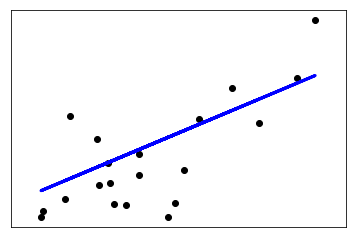

In [36]:
plt.xticks(())
plt.yticks(())
plt.show()